In [1]:
# Print the versions of all the libraries 
print("Tensorflow version: ", tf.__version__)
print("Numpy version: ", np.__version__)
print("Pickle version: ", pkl.format_version)

NameError: name 'tf' is not defined

In [13]:
%pip install tensorflow==2.14.0

  Using cached tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata (4.8 kB)
  Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached tensorboard-2.14.1-py3-none-any.whl.metadata (1.7 kB)
  Using cached keras-2.14.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl.metadata (2.7 kB)
Using cached tensorflow-2.14.0-cp311-cp311-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl (284.2 MB)
Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl (938 kB)
Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)
Using cached tensorboard-2.14.1-py3-none-any.whl (5.5 MB)
Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Atte

  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python311\\Scripts\\google-oauthlib-tool.exe' -> 'c:\\Python311\\Scripts\\google-oauthlib-tool.exe.deleteme'



In [61]:
import numpy as np 
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors


In [62]:
import os
from numpy.linalg import norm

In [ ]:
filenames= []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
     
    

In [35]:
len(filenames)

142

In [37]:
# importing ResNet50 model and config
model = ResNet50(weights='imagenet' , include_top=False, input_shape=(224,224,3))
model.trainable = False 

model= tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d_2 (Gl  (None, 2048)              0         
 obalMaxPooling2D)                                               
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [38]:
# extracting features from image
def extract_feature_from_images(image_path , model):
    img = image.load_img('1163.jpg' , target_size=(224,224))
    img_array = image.img_to_array(img)
    #img_array.shape  // (224, 224,3)

    img_expand_dim = np.expand_dims(img_array,axis=0)
    #img_expand_dim.shape  # (1,224,224,3)

    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    norm_result
    return norm_result



In [39]:
extract_feature_from_images(filenames[0],model)

1/1 [==============================] - 2s 2s/step


array([0.00491869, 0.05812982, 0.00543878, ..., 0.00351523, 0.05245368,
       0.03639515], dtype=float32)

In [40]:
image_features=[]
for file in filenames:
    image_features.append(extract_feature_from_images(file,model))
image_features

1/1 [==============================] - 0s 159ms/step


[array([0.00491869, 0.05812982, 0.00543878, ..., 0.00351523, 0.05245368,
        0.03639515], dtype=float32),
 array([0.00491869, 0.05812982, 0.00543878, ..., 0.00351523, 0.05245368,
        0.03639515], dtype=float32),
 array([0.00491869, 0.05812982, 0.00543878, ..., 0.00351523, 0.05245368,
        0.03639515], dtype=float32),
 array([0.00491869, 0.05812982, 0.00543878, ..., 0.00351523, 0.05245368,
        0.03639515], dtype=float32),
 array([0.00491869, 0.05812982, 0.00543878, ..., 0.00351523, 0.05245368,
        0.03639515], dtype=float32),
 array([0.00491869, 0.05812982, 0.00543878, ..., 0.00351523, 0.05245368,
        0.03639515], dtype=float32),
 array([0.00491869, 0.05812982, 0.00543878, ..., 0.00351523, 0.05245368,
        0.03639515], dtype=float32),
 array([0.00491869, 0.05812982, 0.00543878, ..., 0.00351523, 0.05245368,
        0.03639515], dtype=float32),
 array([0.00491869, 0.05812982, 0.00543878, ..., 0.00351523, 0.05245368,
        0.03639515], dtype=float32),
 array([0.

In [41]:
Image_features = pkl.dump(image_features,open('Image_features.pkl' ,'wb'))

In [42]:
filenames = pkl.dump(filenames,open('filenames.pkl' , 'wb'))

In [43]:
#loading pickle file
#Image_features = pkl.load(open('Image_features.pkl' , 'rb'))
with open('Image_features.pkl', 'rb') as file:
    Image_features = pkl.load(file)

In [44]:
filenames = pkl.load(open('filenames.pkl' , 'rb'))

In [45]:
np.array(Image_features).shape

(142, 2048)

In [47]:
neighbors = NearestNeighbors(n_neighbors=6 , algorithm='brute', metric ='euclidean')

In [48]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [49]:
input_image= extract_feature_from_images('1163.jpg' ,model)

1/1 [==============================] - 0s 226ms/step


In [50]:
neighbors.kneighbors([input_image])

(array([[0., 0., 0., 0., 0., 0.]]), array([[0, 3, 4, 5, 2, 1]], dtype=int64))

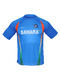

In [53]:
from IPython.display import Image
Image('1163.jpg')

In [55]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


1/1 [==============================] - 0s 440ms/step


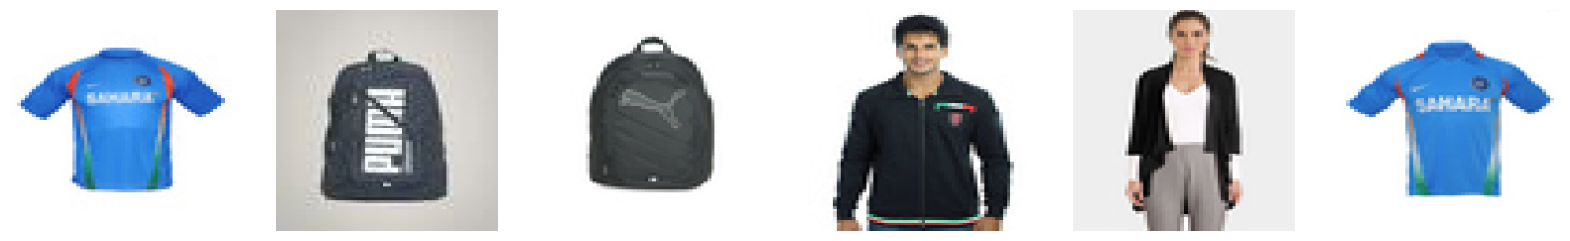

In [63]:
# Function to display the recommended images
def show_images(image_indices, filenames):
    plt.figure(figsize=(20, 10))
    
    for i, idx in enumerate(image_indices[0]):
        img_path = filenames[idx]
        img = image.load_img(img_path, target_size=(224, 224))
        ax = plt.subplot(1, len(image_indices[0]), i + 1)
        ax.imshow(img)
        ax.axis('off')
    
    plt.show()

# Load the image features and filenames if not already done
with open('Image_features.pkl', 'rb') as file:
    Image_features = pkl.load(file)

filenames = pkl.load(open('filenames.pkl', 'rb'))

# Use the NearestNeighbors model to find similar images
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
neighbors.fit(Image_features)

# Choose an image and get recommendations
input_image = extract_feature_from_images('1547.jpg', model)
distances, indices = neighbors.kneighbors([input_image])

# Display the recommended images
show_images(indices, filenames)   